# Title: Photon Blockade in Weakly Driven Cavity Quantum Electrodynamics Systems with Many Emitters——PRL 122,243602

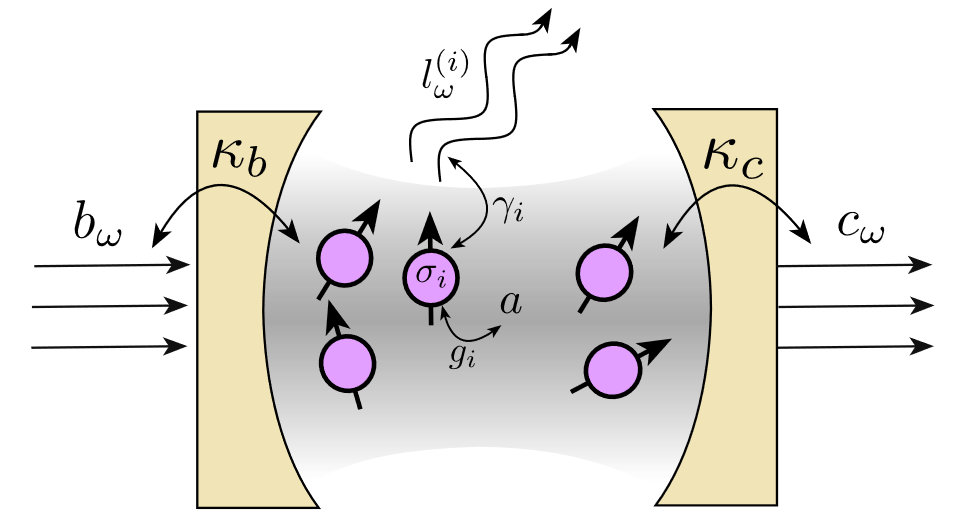

## The effective Hamiltonian

$$H_{\text{eff}}=\left(\omega_c-\frac{i\kappa}{2}\right)a^\dagger a+\sum_{n=1}^{N}{\left[\left(\omega_n-\frac{i\gamma_n}{2}\right)\sigma_n^\dagger\sigma_n+g_i\left(a\sigma_n^\dagger+a^\dagger\sigma_n\right)\right]} $$

Here, when the emitters are identical, i.e., $\omega_n=\omega_e$, $\gamma_n=\gamma$, and $g_n=g$, we have
$$S_z=\sum_{n=1}^N{\sigma_n^\dagger\sigma_n}, S^\dagger = \sum_{n=1}^N{\sigma_n^\dagger} \Longrightarrow H_{\text{eff}}=\left(\omega_c-\frac{i\kappa}{2}\right)a^\dagger a+\left(\omega_e-\frac{i\gamma}{2}\right)S_z+g\left(aS^\dagger+a^\dagger S\right)$$

In [1]:
from qcs_phy import qcs

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# system fixed parameters
κ = 1
γ = 0.01*κ

### Figure 2.(a)
$$g=2\kappa,\omega_e=\omega_c$$

In [4]:
# system parameters
ωc = 0
ωe = ωc
g = 2*κ

ωL = np.linspace(-25, 25, 5000)

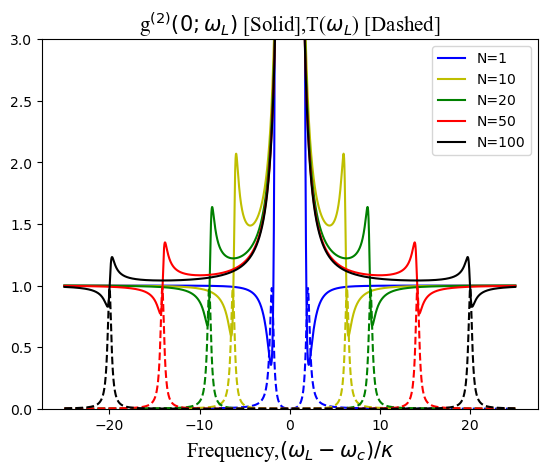

In [5]:
# the number of emitters
Nlist = [1, 10, 20, 50, 100]
color = ['b', 'y', 'g', 'r', 'k']
# construct Input and Output channels
mode_c = [np.sqrt(κ/2), ("a", 0)]
Input = qcs.Input_channel("b", mode_c, ωL)
Output = qcs.Output_channel("c", mode_c)

# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    
    result = qcs(Heff, Input, Output)
    T = result.calculate_quantity("c")
    g2_0 = result.calculate_quantity("cc")
    
    plt.plot(ωL, T, '--', color=color[kk])
    plt.plot(ωL, g2_0, color=color[kk], label="N=%s"%N)
    plt.ylim([0, 3])
plt.xlabel(r"Frequency,$(\omega_L-\omega_c)/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"g$^{(2)}(0;\omega_L)$ [Solid],T($\omega_L$) [Dashed]", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

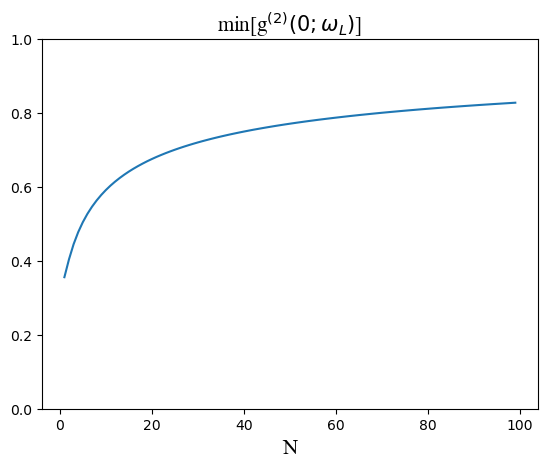

In [6]:
# the number of emitters
Nlist = [k for k in range(1, 100)]

g2_0_min_N = []
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    result = qcs(Heff, Input, Output)
    g2_0 = result.calculate_quantity("cc")
    g2_0_min_N.append(min(g2_0))

plt.plot(Nlist, g2_0_min_N)
plt.xlabel("N", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"min[g$^{(2)}(0;\omega_L)$]", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0, 1])
plt.show()

### Figure 2.(b)
$$g=0.2\kappa,\omega_e=\omega_c$$

In [19]:
# system parameters
ωc = 0
ωe = ωc
g = 0.2*κ

ωL = np.linspace(-3, 3, 1000)

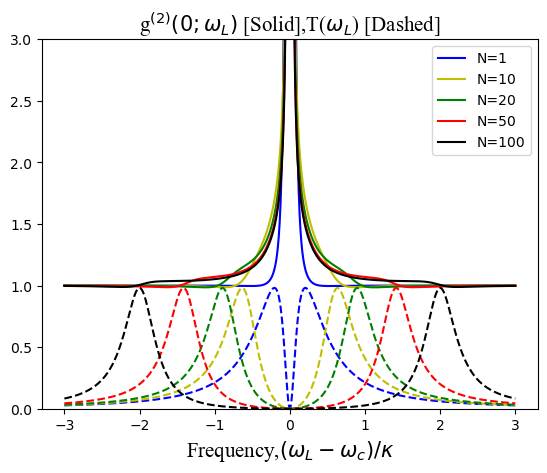

In [20]:
# the number of emitters
Nlist = [1, 10, 20, 50, 100]
color = ['b', 'y', 'g', 'r', 'k']
# construct Input and Output channels
mode_c = [np.sqrt(κ/2), ("a", 0)]
Input = qcs.Input_channel("b", mode_c, ωL)
Output = qcs.Output_channel("c", mode_c)

# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    
    result = qcs(Heff, Input, Output)
    T = result.calculate_quantity("c")
    g2_0 = result.calculate_quantity("cc")
    
    plt.plot(ωL, T, '--', color=color[kk])
    plt.plot(ωL, g2_0, color=color[kk], label="N=%s"%N)
    plt.ylim([0, 3])
plt.xlabel(r"Frequency,$(\omega_L-\omega_c)/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"g$^{(2)}(0;\omega_L)$ [Solid],T($\omega_L$) [Dashed]", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

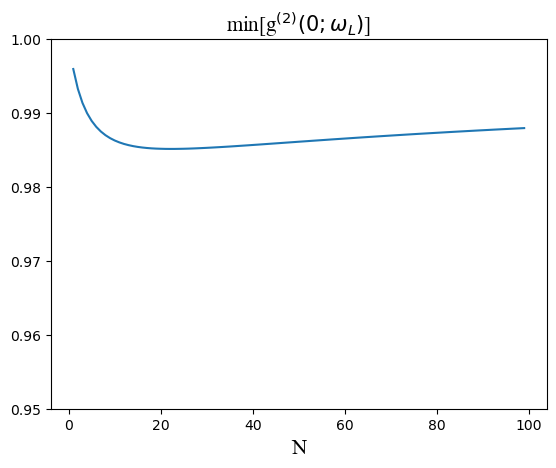

In [21]:
# the number of emitters
Nlist = [k for k in range(1, 100)]

g2_0_min_N = []
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    result = qcs(Heff, Input, Output)
    g2_0 = result.calculate_quantity("cc")
    g2_0_min_N.append(min(g2_0))

plt.plot(Nlist, g2_0_min_N)
plt.xlabel("N", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"min[g$^{(2)}(0;\omega_L)$]", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0.95, 1])
plt.show()

### Figure 2.(c)
$$g=2\kappa,\omega_e-\omega_c=0.8\kappa$$

In [22]:
# system parameters
ωc = 0
ωe = ωc + 0.8*κ
g = 0.2*κ

ωL = np.linspace(-3, 3, 1000)

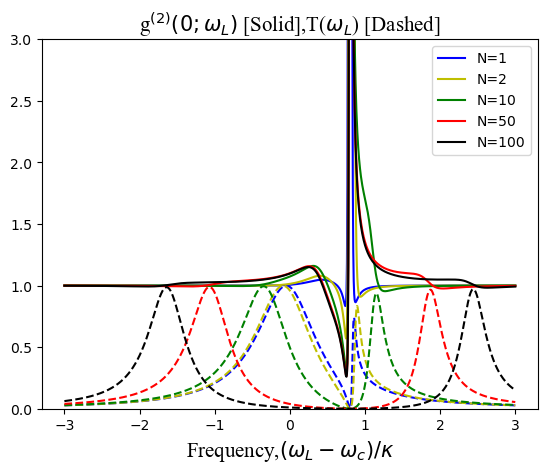

In [23]:
# the number of emitters
Nlist = [1, 2, 10, 50, 100]
color = ['b', 'y', 'g', 'r', 'k']
# construct Input and Output channels
mode_c = [np.sqrt(κ/2), ("a", 0)]
Input = qcs.Input_channel("b", mode_c, ωL)
Output = qcs.Output_channel("c", mode_c)

# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    
    result = qcs(Heff, Input, Output)
    T = result.calculate_quantity("c")
    g2_0 = result.calculate_quantity("cc")
    
    plt.plot(ωL, T, '--', color=color[kk])
    plt.plot(ωL, g2_0, color=color[kk], label="N=%s"%N)
    plt.ylim([0, 3])
plt.xlabel(r"Frequency,$(\omega_L-\omega_c)/\kappa$", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"g$^{(2)}(0;\omega_L)$ [Solid],T($\omega_L$) [Dashed]", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()

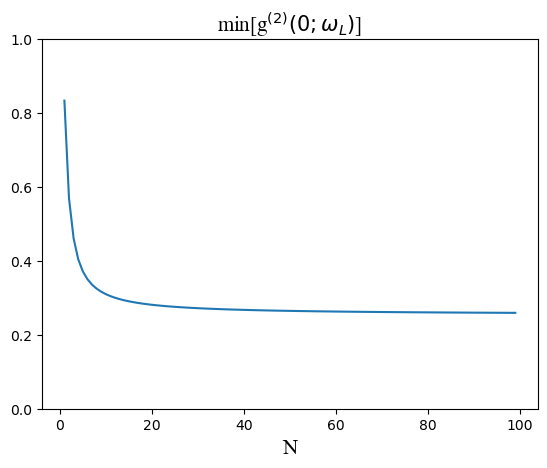

In [24]:
# the number of emitters
Nlist = [k for k in range(1, 100)]

g2_0_min_N = []
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    result = qcs(Heff, Input, Output)
    g2_0 = result.calculate_quantity("cc")
    g2_0_min_N.append(min(g2_0))

plt.plot(Nlist, g2_0_min_N)
plt.xlabel("N", fontdict={"family": "Times New Roman", "size": 15})
plt.title(r"min[g$^{(2)}(0;\omega_L)$]", fontdict={"family": "Times New Roman", "size": 15})
plt.ylim([0, 1])
plt.show()

### Figure 6.(a) in appendix
$$g=0.2\kappa,\omega_e-\omega_c=0.8\kappa$$

In [25]:
# system parameters
ωc = 0
ωe = ωc + 0.8*κ
g = 0.2*κ

γ = 0.012*κ
ωL = 0.75*κ
tau = np.linspace(0, 70, 7000)

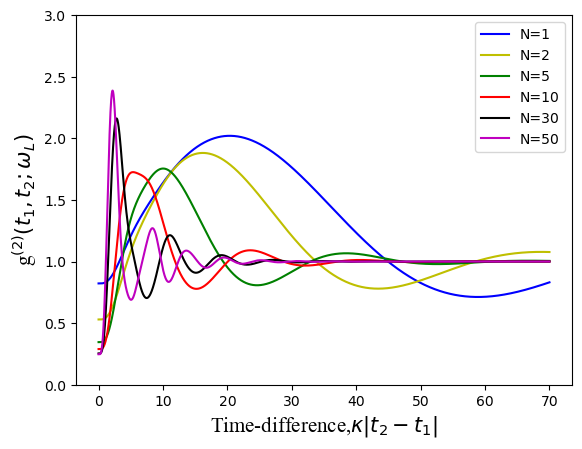

In [28]:
# the number of emitters
Nlist = [1, 2, 5, 10, 30, 50]
color = ['b', 'y', 'g', 'r', 'k', 'm']
# construct Input and Output channels
mode_c = [np.sqrt(κ/2), ("a", 0)]
Input = qcs.Input_channel("b", mode_c, ωL)
Output = qcs.Output_channel("c", mode_c)

# construct effective Hamiltonian and calculate transmissivity and 2nd-order ETCF
for kk, N in enumerate(Nlist):
    Heff = []
    Heff.append([(ωc-1j*κ/2), ("ad", 0), ("a", 0)])
    Heff.append([(ωe-1j*γ/2), ("Sz N=%s"%N, 0)])
    Heff.append([g, ("ad", 0), ("Sm N=%s"%N, 0)])
    Heff.append([g, ("a", 0), ("Sp N=%s"%N, 0)])
    
    result = qcs(Heff, Input, Output)

    g2_tau = result.calculate_2nd_uETCF("cc", tau)
    
    plt.plot(tau, g2_tau, color=color[kk], label="N=%s"%N)
    plt.ylim([0, 3])
plt.xlabel(r"Time-difference,$\kappa|t_2-t_1|$", fontdict={"family": "Times New Roman", "size": 15})
plt.ylabel(r"g$^{(2)}(t_1,t_2;\omega_L)$", fontdict={"family": "Times New Roman", "size": 15})
plt.legend()
plt.show()